In [5]:
import pandas as pd
import numpy as np

In [29]:
data=pd.read_csv('Titanic-Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        206 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
data['Age']=data['Age'].fillna(np.mean(data['Age']))

In [31]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [34]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [36]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [37]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# ONE HOT ENCODING

In [41]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [42]:
data['Sex']=lb.fit_transform(data['Sex'])

In [43]:
data['Sex'].unique()

array([1, 0])

In [44]:
data['Embarked']=lb.fit_transform(data['Embarked'])

In [45]:
data['Embarked'].unique()

array([2, 0, 1])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [49]:
data.drop('Name',inplace=True,axis=1)

# Data visualization


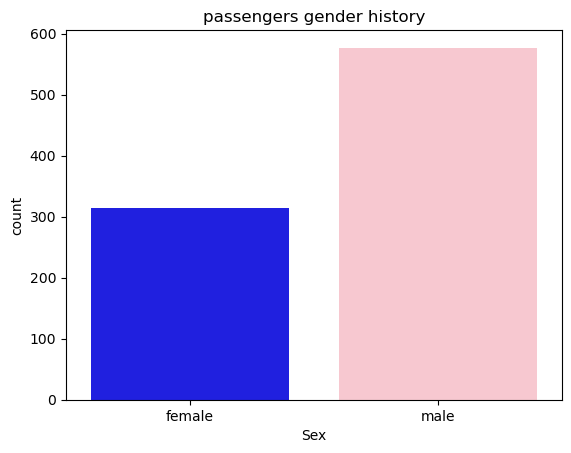

In [116]:
import seaborn as sns
import matplotlib.pyplot as mlt
ax=sns.countplot(x='Sex',data=data,palette={1:'pink',0:'blue'})
ax.set_xticklabels(['female','male'])

mlt.title('passengers gender history')
mlt.show()

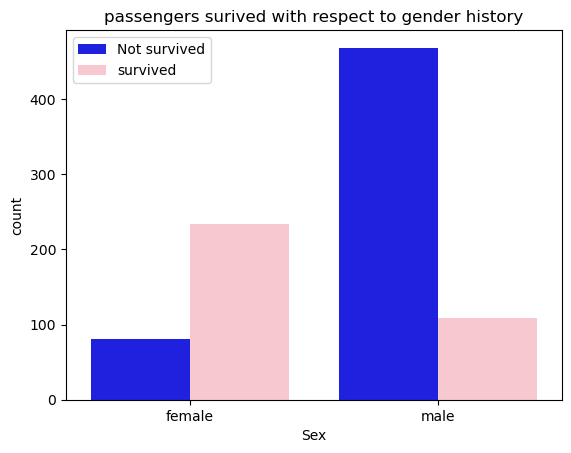

In [76]:
ax=sns.countplot(x='Sex',hue='Survived',data=data,palette={1:'pink',0:'blue'})
ax.set_xticklabels(['female','male'])

mlt.legend(labels=['Not survived','survived'])
mlt.title('passengers surived with respect to gender history')
mlt.show()

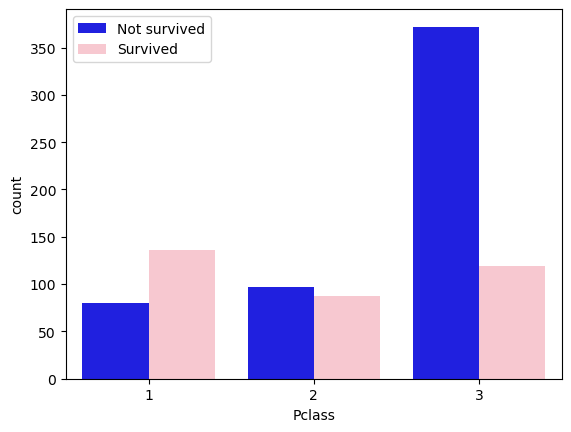

In [75]:

ax=sns.countplot(x='Pclass',hue='Survived',data=data,palette=['blue','pink'])
mlt.legend(labels=['Not survived','Survived'])

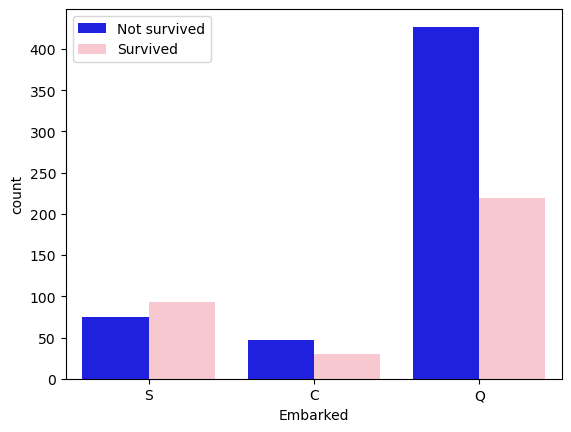

In [78]:

ax=sns.countplot(x='Embarked',hue='Survived',data=data,palette=['blue','pink'])
ax.set_xticklabels(['S','C','Q'])
mlt.legend(labels=['Not survived','Survived'])

# Data splitting

In [83]:
x=data[['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]
x.head()

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3,1,22.0,7.2500,2,1,0
1,1,0,38.0,71.2833,0,1,0
2,3,0,26.0,7.9250,2,0,0
3,1,0,35.0,53.1000,2,1,0
4,3,1,35.0,8.0500,2,0,0


In [86]:
y=data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Train test split

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic regression

In [91]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [92]:
y_pred=log.predict(x_test)

# Classification report for logistic regression

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['Not Survived','Survived']))


              precision    recall  f1-score   support

Not Survived       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Confusion matrix

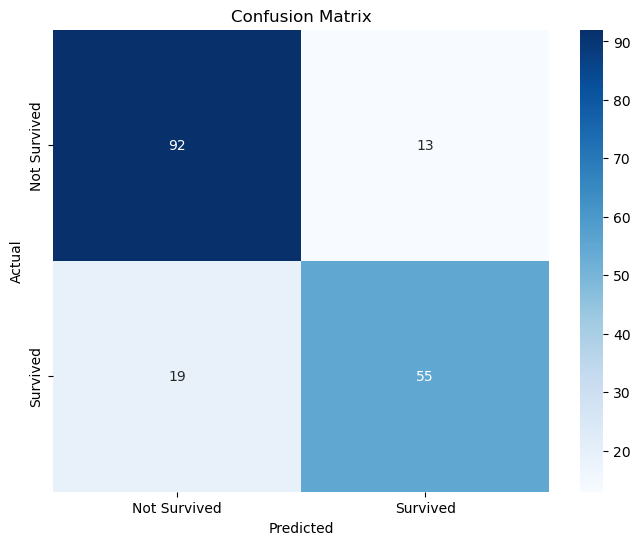

In [114]:
mlt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues',xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
mlt.xlabel('Predicted')
mlt.ylabel('Actual')
mlt.title('Confusion Matrix')
mlt.show()

# Random forest classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
rd.fit(x_train,y_train)


RandomForestClassifier()

# Classification report for random forest classifier

In [118]:
y_pred=rd.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['Not Survived','Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.87      0.85       105
    Survived       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Confusion matrix

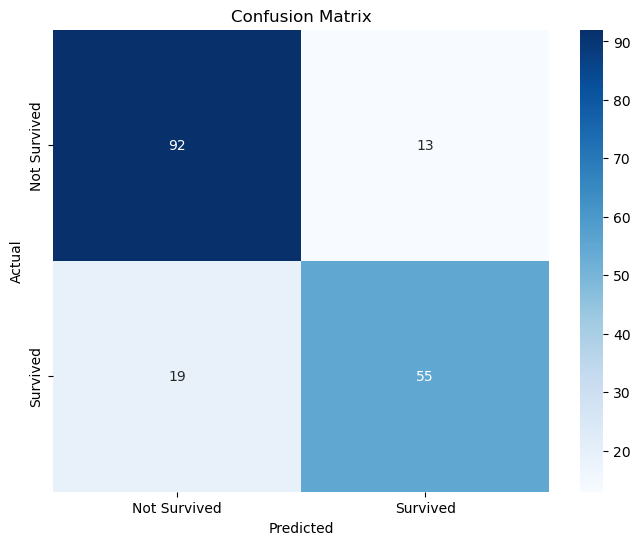

In [111]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()